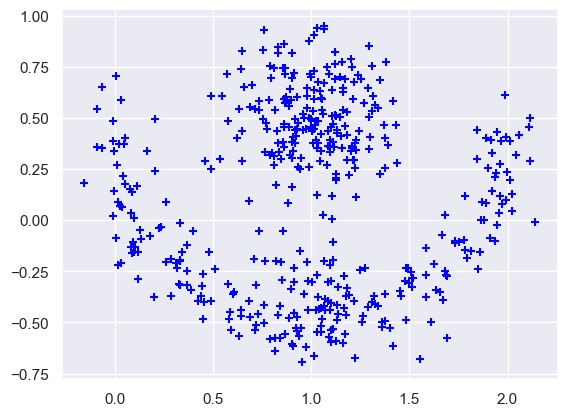

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns

sns.set_theme(style="darkgrid")

# 使用make_moons函数生成月牙形数据
X, y = make_moons(n_samples=400, noise=0.1, random_state=0)
X_y1 = X[y == 1]
mu = np.array([1, 0.5])  # 均值
sigma = np.array([0.2, 0.2])  # 标准差
num_samples = 200  # 生成的样本数量

# 在指定位置生成正态分布
samples1 = np.random.normal(mu, sigma, (num_samples, 2))
mu = np.array([1, -0.4])  # 均值
sigma = np.array([0.15, 0.15])  # 标准差
num_samples = 50  # 生成的样本数量

# 在指定位置生成正态分布
samples2 = np.random.normal(mu, sigma, (num_samples, 2))
combined = np.vstack((X_y1, samples1, samples2))
plt.scatter(combined[:, 0], combined[:, 1], c='blue', s=40, marker='+')

In [2]:
import pandas as pd

df = pd.read_csv('sample.csv',header=None, names=['x', 'y'])
df = df.values

In [3]:
from sklearn.cluster import MeanShift

# 创建 MeanShift 对象
ms = MeanShift(bandwidth=0.1)

# 对数据进行聚类
ms.fit(df)

# 获取聚类标签
labels = ms.labels_

# 获取聚类中心
cluster_centers = ms.cluster_centers_

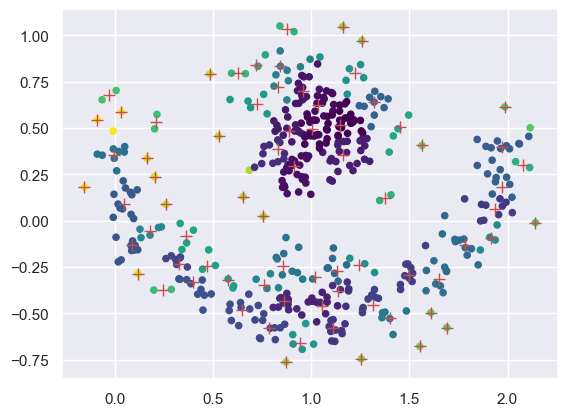

In [4]:
# 可视化聚类结果
plt.scatter(df[:, 0], df[:, 1], c=labels, s=20, cmap='viridis')
for center in cluster_centers:
    plt.plot([center[0]], [center[1]], 'r+', ms=9, mew=1)

plt.show()

In [5]:
from collections import Counter

# 计算每个类别的样本数
counter = Counter(labels)

# 找出样本数少于四个的类别
small_classes = [cls for cls, count in counter.items() if count < 4]

# 删除样本数少于四个的类别
filtered_combined = np.array([sample for sample, label in zip(df, labels) if label not in small_classes])
filtered_labels = np.array([label for label in labels if label not in small_classes])
np.savetxt('sample_filtered.csv', filtered_combined, delimiter=',')

In [6]:
df = pd.read_csv('sample_filtered.csv',header=None, names=['x', 'y'])

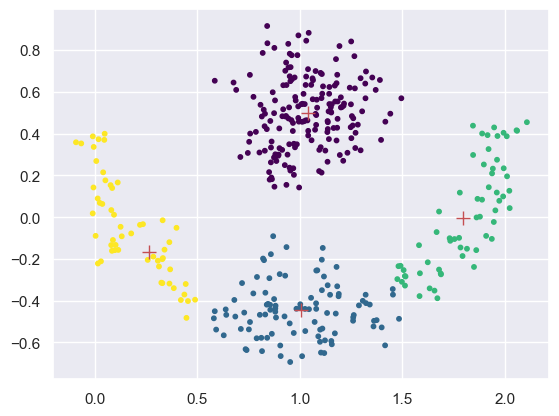

In [15]:
bd = 0.5
ms = MeanShift(bandwidth=bd)
ms.fit(df)
labels = pd.DataFrame(ms.labels_,columns=['Cluster ID'])
cluster_centers = ms.cluster_centers_
result = pd.concat((df,labels), axis=1)
for center in cluster_centers:
    plt.plot([center[0]], [center[1]], 'r+', ms=10, mew=1)
plt.scatter(x=result['x'],y=result['y'],c=result['Cluster ID'], cmap='viridis',s=10)
# plt.axis('off')

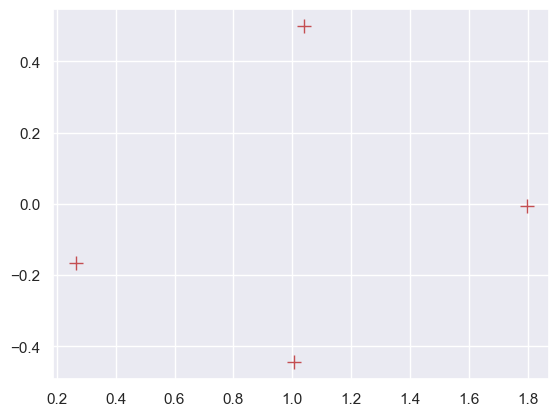

In [16]:
# 可视化聚类结果
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'r+', ms=9, mew=1)
# plt.savefig('cluster_result_B6.png',dpi=600)
plt.show()

In [17]:
from sklearn.metrics import pairwise_distances

# Get the Cluster IDs from the result1 dataframe
cluster_ids = result['Cluster ID'].unique()

# Sort the cluster IDs in ascending order
sorted_cluster_ids = sorted(cluster_ids)

# Calculate the pairwise distances between the sorted cluster IDs
sorted_distances = pairwise_distances(df, metric='euclidean')

# Create a dataframe with sorted Cluster IDs as rows and columns
distance_matrix = pd.DataFrame(sorted_distances, index=result['Cluster ID'], columns=result['Cluster ID'])
distance_matrix

Cluster ID,1,2,3,3,2,1,3,3,2,1,...,1,1,1,1,1,1,1,1,1,1
Cluster ID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.215668,1.320410,1.696101,0.389048,0.578470,1.609766,1.025748,0.308224,0.114097,...,0.619958,0.408877,0.498700,0.299641,0.257614,0.624770,0.218160,0.521707,0.302532,0.306267
2,0.215668,0.000000,1.425627,1.745617,0.182962,0.764814,1.651215,1.149067,0.093770,0.286826,...,0.698434,0.588121,0.694030,0.447220,0.368128,0.789907,0.328071,0.613678,0.473890,0.441988
3,1.320410,1.425627,0.000000,0.550266,1.584245,0.865729,0.537114,0.310867,1.492410,1.206416,...,0.729329,0.958856,0.955038,1.021881,1.071518,0.756145,1.113516,0.812426,1.033623,1.014163
3,1.696101,1.745617,0.550266,0.000000,1.873000,1.350614,0.110935,0.816011,1.791262,1.587828,...,1.077107,1.401075,1.430325,1.417774,1.438673,1.230708,1.478025,1.177445,1.447745,1.402299
2,0.389048,0.182962,1.584245,1.873000,0.000000,0.947767,1.774457,1.316778,0.094898,0.469427,...,0.854950,0.770986,0.876590,0.628046,0.545087,0.970857,0.506524,0.777562,0.656635,0.621214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.624770,0.789907,0.756145,1.230708,0.970857,0.122190,1.169440,0.445339,0.876609,0.516357,...,0.339729,0.219640,0.201002,0.342832,0.429368,0.000000,0.465381,0.304435,0.322766,0.350794
1,0.218160,0.328071,1.113516,1.478025,0.506524,0.456602,1.391639,0.827177,0.411886,0.116679,...,0.402631,0.280518,0.402275,0.124679,0.042018,0.465381,0.000000,0.306059,0.169592,0.114777
1,0.521707,0.613678,0.812426,1.177445,0.777562,0.378724,1.094777,0.539710,0.684047,0.411116,...,0.101624,0.290126,0.392558,0.243798,0.264864,0.304435,0.306059,0.000000,0.285508,0.225818


In [19]:
dismatrix = pd.DataFrame(index=sorted_cluster_ids, columns=sorted_cluster_ids)
for i in sorted_cluster_ids:
    for j in sorted_cluster_ids:
        if i != j:
            dismatrix.loc[i, j]=distance_matrix.loc[i, j].min().min()
        else:
            dismatrix.loc[i, j]=99
dismatrix

,0,1,2,3
0,99,0.237034,0.373196,0.460618
1,0.237034,99,0.052613,0.110888
2,0.373196,0.052613,99,0.991641
3,0.460618,0.110888,0.991641,99


In [29]:
# Convert the distance_matrix dataframe to a numpy array
distance_matrix_np = np.array(dismatrix)

# Iterate over each row in the distance_matrix_np array
for i in range(distance_matrix_np.shape[0]):
    # Sort the distances in the current row in ascending order
    sorted_distances = np.sort(distance_matrix_np[i])
    # print(sorted_distances[1])
    
    # Set all distances after the third shortest distance to zero
    distance_matrix_np[i][distance_matrix_np[i] > 0.2] = 0

distance_matrix_np


array([[0, 0, 0, 0],
       [0, 0, 0.05261307638722976, 0.11088808476495071],
       [0, 0.05261307638722976, 0, 0],
       [0, 0.11088808476495071, 0, 0]], dtype=object)

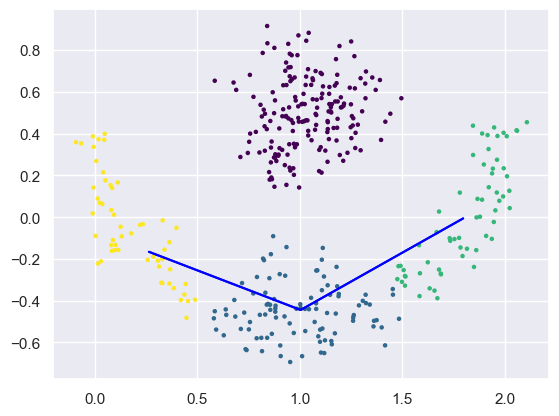

In [31]:
# Iterate over each row and column in the distance_matrix_np array
for i in range(distance_matrix_np.shape[0]):
    for j in range(distance_matrix_np.shape[1]):
        # Check if the value is non-zero
        if distance_matrix_np[i][j] != 0:
            # Connect the points in data_c1 corresponding to the cluster IDs
            plt.plot([cluster_centers[i][0], cluster_centers[j][0]], [cluster_centers[i][1], cluster_centers[j][1]],'blue')

# Plot the scatter plot of data_c1 with cluster IDs
plt.scatter(x=result['x'], y=result['y'], c=result['Cluster ID'], cmap='viridis', s=5)

# Show the plot
plt.show()


In [45]:
cluster_id1 = 3
cluster_samples1 = result[result['Cluster ID'] == cluster_id1]
random_sample1 = cluster_samples1.sample(n=1)
coordinates1 = random_sample1[['x', 'y']].values[0]
print(coordinates1)


[ 0.08414914 -0.16099749]


In [41]:
cluster_id2 = 2
cluster_samples2 = result[result['Cluster ID'] == cluster_id2]
random_sample2 = cluster_samples2.sample(n=1)
coordinates2 = random_sample2[['x', 'y']].values[0]
print(coordinates2)

[1.95454416 0.0327825 ]


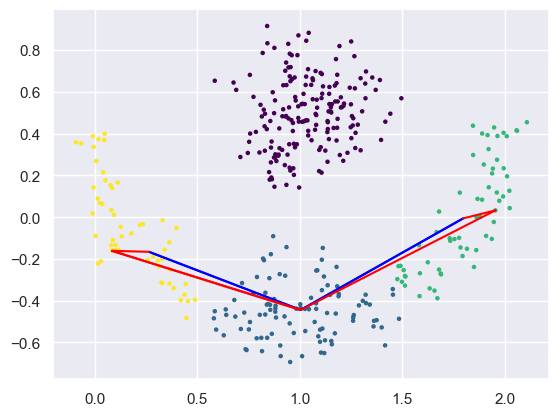

In [53]:
# Iterate over each row and column in the distance_matrix_np array
for i in range(distance_matrix_np.shape[0]):
    for j in range(distance_matrix_np.shape[1]):
        # Check if the value is non-zero
        if distance_matrix_np[i][j] != 0:
            # Connect the points in data_c1 corresponding to the cluster IDs
            plt.plot([cluster_centers[i][0], cluster_centers[j][0]], [cluster_centers[i][1], cluster_centers[j][1]],'blue')

# Plot the scatter plot of data_c1 with cluster IDs
plt.scatter(x=result['x'], y=result['y'], c=result['Cluster ID'], cmap='viridis', s=5)
plt.plot([coordinates1[0], cluster_centers[cluster_id1][0]], [coordinates1[1], cluster_centers[cluster_id1][1]],'red')
for j in range(distance_matrix_np.shape[1]):
    # Check if the value is non-zero
    if distance_matrix_np[cluster_id1][j] != 0:
        # Connect the points in data_c1 corresponding to the cluster IDs
        plt.plot([coordinates1[0], cluster_centers[j][0]], [coordinates1[1], cluster_centers[j][1]],'red')
plt.plot([coordinates2[0], cluster_centers[cluster_id2][0]], [coordinates2[1], cluster_centers[cluster_id2][1]],'red')
for j in range(distance_matrix_np.shape[1]):
    # Check if the value is non-zero
    if distance_matrix_np[cluster_id2][j] != 0:
        # Connect the points in data_c1 corresponding to the cluster IDs
        plt.plot([coordinates2[0], cluster_centers[j][0]], [coordinates2[1], cluster_centers[j][1]],'red')
# Show the plot
plt.show()